# Introducción a la manipulación de Estructuras de Datos avanzadas con Pandas

## Librería Numpy

*Numpy* es una librería de Python fundamental para la computación científica. Entre sus características está la creación de arreglos multidimensionales, que se pueden tratar como vectores, y posee una gran rapidez a la hora de hacer operaciones matemáticas sobre los mismos. Lo cual la hace una herramienta necesaria para proyectos con requerimientos de alta computación y cálculo matemático y es por eso de su gran popularidad en el ecosistema científico.

### Operaciones matemáticas con Arreglos de Numpy

Para empezar, importaremos la librería y creamos nuestro primer Arreglo de Numpy, luego lo afectaremos con algunas operaciones matemáticas básicas. Es común renombrar la librería `Numpy` como `np`.


In [1]:
# Se importa la librería numpy. Por lo general el acrónimo para la librería numpy es np.
import numpy as np

# Se crea un arreglo de números
nums = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Se imprime el valor del arreglo
nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

**Vale la pena mencionar que un arreglo de Numpy se parece mucho a una lista nativa de Python.** La diferencia principal radica en el tipo de operaciones de orden matemático que se pueden realizar sobre un arreglo de la librería y las listas nativas de Python.

Tomemos como punto de partida la suma de dos arreglos de `Numpy`, comparado con una suma de listas de Python:

In [2]:
# Se imprime la suma del arreglo de Numpy
nums + nums

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

Se mantuvo el tamaño de la lista, pero sus elementos fueron sumados, y es aquí el potencial y la simpleza de los arreglos de `Numpy`, y el porque de su basto uso en el mundo científico.

Miremos un código equivalente con una lista nativa de Python:

In [3]:
# Lista por compresión con adición de sus elementos
lista_nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[x + x for x in lista_nums]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

No creemos que sea complicado estar creando *listas de comprensión* de Python, pero claramente se reducirían las líneas de código en nuestro programa usando los arreglos de **Numpy**. Y sería imposible lograrlo si necesitamos sumar dos listas.

Los *arreglos de Numpy* también pueden realizar las demás operaciones siguiendo el mismo modelo:

```markdown
<arreglo_numpy> <operacion (+, -, *, /)> <arreglo_numpy>
```
*Tengamos cuidado con la división si hay ceros en el denominador, recordemos que no es posible dividir entre cero, en tal caso saldría un error*

Ahora, para ver el potencial de los arreglos de Numpy, ¿qué pasaría si intentamos sumar dos arreglos de tamaño $n$, hablemos de arreglos de $10000000$ elementos?

In [4]:
#Se importa la libreria de Numpy
import numpy as np

#Se crean dos arreglos con 1 millón de elementos, en donde cada elemento tiene un valor aleatorio entre 0-10
x = np.random.choice(10, 10000000)
y = np.random.choice(10, 10000000)

print(x * y)

[ 4  0 16 ... 63 63  6]


¿Lo vieron? La multiplicación tomo tan solo milisegundos. Y es ahí donde usar la librería vale la pena.

##  Introducción a las Series de Pandas

Antes de hablar de Dataframes es importante que hagamos un pequeño repaso sobre las **Series**, al mismo tiempo empezaremos a interactuar con la librería de Pandas.

**`Pandas`** es una librería de Python (Al igual que `Numpy`), que se caracteriza por proveer estructuras de datos que son de rápido procesamiento, que son fáciles de expresar para hacer que el trabajo con datos relacionales sea muy fácil e intuitivo. [Mas info aqui](https://pandas.pydata.org/docs/getting_started/overview.html)

¿Qué es una Serie? ¿Cómo se crea una Serie? Veamos las respuestas a estas preguntas:

Las Series son un tipo de estructura unidimensional *(1D)* muy parecida a un arreglo, con la característica de que podemos etiquetar en cierta medida sus datos a través de índices.

Para estudiar el potencial de las series vamos a interactuar con el archivo `iris.data` (./data/iris.data) que proviene del repositorio de datos de la [UCI Machine Learning](https://archive-beta.ics.uci.edu/).

In [5]:
import pandas as pd

# Se importa el archivo iris.data y se lee su contenido
with open("data/iris.data", "r") as DATA:
    iris_dataset = DATA.read()

# Se limpia el dataset y se construye la serie a partir del arreglo generado por el `split` 
iris_dataset = iris_dataset.split('\n')
iris_dataset = [i.split(',') for i in iris_dataset]

# Se crea la serie con los datos del dataset
serie_de_iris = pd.Series(iris_dataset)

# Se imprime la serie
serie_de_iris

0         [5.1, 3.5, 1.4, 0.2, Iris-setosa]
1         [4.9, 3.0, 1.4, 0.2, Iris-setosa]
2         [4.7, 3.2, 1.3, 0.2, Iris-setosa]
3         [4.6, 3.1, 1.5, 0.2, Iris-setosa]
4         [5.0, 3.6, 1.4, 0.2, Iris-setosa]
                       ...                 
145    [6.7, 3.0, 5.2, 2.3, Iris-virginica]
146    [6.3, 2.5, 5.0, 1.9, Iris-virginica]
147    [6.5, 3.0, 5.2, 2.0, Iris-virginica]
148    [6.2, 3.4, 5.4, 2.3, Iris-virginica]
149    [5.9, 3.0, 5.1, 1.8, Iris-virginica]
Length: 150, dtype: object

*De ahora en adelante siempre que queramos visualizar el contenido de una serie y/o un Dataframe usaremos el método `head`, el cual solo muestra los primeros datos y no todo el conjunto.*

Y así de fácil se construye una estructura de datos básica pero potente que nos da la libreria de *Pandas*. Exploremos lo que tenemos:

- Cada renglón es un arreglo de una dimensión con cinco elementos, se imprimieron $150$ filas, cada una con una lista de 5 elementos, más la columna de enumeración.

- Las *series* al igual que las listas y arreglos de *Numpy* poseen métodos y su manipulación también se logra por medio de indexación.


In [6]:
# Ejemplo 1: Se imprime los primeros datos de la serie utilizando el método head.
serie_de_iris.head()

0    [5.1, 3.5, 1.4, 0.2, Iris-setosa]
1    [4.9, 3.0, 1.4, 0.2, Iris-setosa]
2    [4.7, 3.2, 1.3, 0.2, Iris-setosa]
3    [4.6, 3.1, 1.5, 0.2, Iris-setosa]
4    [5.0, 3.6, 1.4, 0.2, Iris-setosa]
dtype: object

Otro método útil es el método `index`, devuelve la lista de índices y su rango.

In [7]:
# Se imprimen los indexes del arreglo, en este caso hace referencia a la primera columna
serie_de_iris.index

RangeIndex(start=0, stop=150, step=1)

Que tal si quisieramos acceder a los elementos de la posicion $120$ en adelante:

In [8]:
# Se imprimen los elementos desde la posición 120 en adelante
serie_de_iris[120:]

120    [6.9, 3.2, 5.7, 2.3, Iris-virginica]
121    [5.6, 2.8, 4.9, 2.0, Iris-virginica]
122    [7.7, 2.8, 6.7, 2.0, Iris-virginica]
123    [6.3, 2.7, 4.9, 1.8, Iris-virginica]
124    [6.7, 3.3, 5.7, 2.1, Iris-virginica]
125    [7.2, 3.2, 6.0, 1.8, Iris-virginica]
126    [6.2, 2.8, 4.8, 1.8, Iris-virginica]
127    [6.1, 3.0, 4.9, 1.8, Iris-virginica]
128    [6.4, 2.8, 5.6, 2.1, Iris-virginica]
129    [7.2, 3.0, 5.8, 1.6, Iris-virginica]
130    [7.4, 2.8, 6.1, 1.9, Iris-virginica]
131    [7.9, 3.8, 6.4, 2.0, Iris-virginica]
132    [6.4, 2.8, 5.6, 2.2, Iris-virginica]
133    [6.3, 2.8, 5.1, 1.5, Iris-virginica]
134    [6.1, 2.6, 5.6, 1.4, Iris-virginica]
135    [7.7, 3.0, 6.1, 2.3, Iris-virginica]
136    [6.3, 3.4, 5.6, 2.4, Iris-virginica]
137    [6.4, 3.1, 5.5, 1.8, Iris-virginica]
138    [6.0, 3.0, 4.8, 1.8, Iris-virginica]
139    [6.9, 3.1, 5.4, 2.1, Iris-virginica]
140    [6.7, 3.1, 5.6, 2.4, Iris-virginica]
141    [6.9, 3.1, 5.1, 2.3, Iris-virginica]
142    [5.8, 2.7, 5.1, 1.9, Iris

Como una *Serie* es una arreglo de una dimensión *(1D)*, cada fila contiene toda la información devuelta por el dataset original, representada en un arreglo nativo de *Python* para su manipulación. **Técnicamente esto hace que sea difícil** la manipulación de los datos al interior de cada serie (por ejemplo, hallar la media de la primera columna, lo que conlleva a que desperdiciemos las funcionalidades nativas de una Serie, porque tendríamos que crear una serie por cada columna de datos, luego serie ineficiente.

Veamos un ejemplo de cómo extraer los valores de la primera columna en cuestión, para esto, comenzamos cargando nuevamente el dataset original pero esta vez solo tomamos la primera columna:

In [9]:
import pandas as pd

with open("data/iris.data", "r") as DATA:
    iris_dataset = DATA.read()

# Se limpia el dataset y se construye la serie a partir del arreglo generado por el `split` 
iris_dataset = iris_dataset.split('\n')

# Se extrae del dataset la primera columna y se convierte sus datos a tipo float
iris_dataset = [float(j[0]) if j[0] != '' else 0  for j in [i.split(',') for i in iris_dataset]]

# Se crea la serie con los datos del dataset
serie_de_iris_col_1 = pd.Series(iris_dataset)

# Se imprime la serie con la primera columna del dataset
serie_de_iris_col_1

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Length: 150, dtype: float64

Y ahora si podemos encontrar algunas estadísticas como la media de todos los valores, y usaremos *Numpy* para esto:

In [10]:
import numpy as np

# Se calcula la media de la serie a partir del metodo mean de numpy
print('Tamaño promedio los datos:')
np.mean(serie_de_iris_col_1)

Tamaño promedio los datos:


5.843333333333334

Debido a las limitaciones de las *Series (como lo vimos previamente)* tendremos que dar paso a una nueva estructura de datos, y es aquí en donde los *Dataframes* entran en juego. Pero, ¿qué tal si primero describimos las columnas que vienen de nuestro dataset?

De acuerdo con la descripcion encontrada en la página sabemos que tiene la siguiente estructura:

| No. |      Columna         |  Tipo de dato | Posibles Valores                                |
|-----|:--------------------:|--------------:|:------------------------------------------------|
| 1   |  longitud del sepalo | float/cm      | Positivos                                       |
| 2   |    ancho del sepalo  |   float/cm    | Positivos                                       |
| 3   |  longitud del petalo |    float/cm   | Positivos                                       |
| 4   |   ancho del petalo   |    float/cm   | Positivos                                       |
| 5   |    clase             | string/texto  | Iris Setosa, Iris Versicolour,  Iris Virginica  |

Es momento de que modifiquemos la *Serie*, y la convirtamos en un *Dataframe* y usemos a nuestro favor todo su potencial.

##  Introducción a los DataFrames

Un *DataFrame* es un arreglo de $n$ dimensiones de datos estructurados que puede almacenar datos de diferentes tipos. Si, es como una hoja de cálculo o una tabla de una base de datos.

Los DataFrame son más comunes que las Series *(Aparecen por todos lados en la computación científica, en el análisis y visualización de datos y entre otros)*  y es por esta razón que serán objeto de estudio en la práctica.

Por lo general se puede crear un `DataFrame` desde diferentes fuentes de datos, pero en esta ocasión seguiremos usando el dataset de los [`iris`](./data/iris.data).


In [11]:
import pandas as pd

# Creamos el DataFrame a partir de iris_dataset, el parámetro names permite nombrar las columnas
df_iris = pd.read_csv("./data/iris.data", names=["long_sepalo", "ancho_sepalo", "long_petalo", "ancho_petalo", "clase"])

# Se imprimen los primeros 5 elementos del dataframe
df_iris.head()

,long_sepalo,ancho_sepalo,long_petalo,ancho_petalo,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


*Nota: de ahora en adelante siempre que queramos importar el contenido de un dataset local usaremos el método `read_csv` de la librería de Pandas.*

Como vimos fue muy fácil construir el `DataFrame`, ahora, ¿qué tal si lo manipulamos?, podríamos contestar preguntas del tipo: ¿cuántas clases de iris tenemos?, ¿cuál es el tamaño promedio de la longitud del pétalo?, ¿para todas las clases o para una en particular? Veamos cómo se hace:

Si queremos trabajar con la primera columna, podemos hacerlo fácimente de esta manera:

In [12]:
df_iris['long_sepalo'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: long_sepalo, dtype: float64

Los elementos de la columna se almacenan como una `Serie`, con la que se puede operar fácilmente, por ejemplo encontrar el promedio de la longitud del sépalo.

In [13]:
### Ejemplo 1: Promedio de Longitud del Sépalo sin importar la clase
mean_long_sepalo = np.mean(df_iris['long_sepalo'])
print('Tamaño promedio del pétalo de las iris:')
print(mean_long_sepalo)

Tamaño promedio del pétalo de las iris:
5.843333333333334


Eso fue sencillo, hallar la media de $150$ filas y con ello, darle un poquito más de significado al dataset.

Los *Dataframe* tienen muchos métodos que permiten operar, manipular, agrupar, filtrar los datos, entre otros. Veamos algunos de los más importantes:

* **groupby**: sirve para agrupar las filas en torno al valor de alguna de sus columnas
* **assign**: sirve para agregar nuevas columnas a partir de los valores de otras
* **query**: sirve para filtrar el dataset a partir de alguna condición *(Como por ejemplo el valor de una columna)*
* **filter**: filtra un Dataframe por columnas o filas de acuerdo con sus etiquetas en los índices. *(En buena medida, como el método `query` pero el filtro se basa en los índices)
* **value_counts()**: sirve para contar cuantos valores en una columna

¿Y ahora qué tal si calculamos la cantidad de clases de iris que tenemos? Veamos cómo se hace:

In [14]:
# Ejemplo 2: se hace uso del método groupby para agrupar el dataframe por la columna clase
print('El número de clases en el dataset es: ') 
len(df_iris.groupby('clase'))

El número de clases en el dataset es: 


3

In [15]:
# cuántos datos hay de cada clase
df_iris['clase'].value_counts()

clase
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Ahora vamos a darle paso a las respuestas de las preguntas faltantes, veamos cúál es la media de la longitud del pétalo para la clase de *Iris-setosa* por medio del método **query**:

In [16]:
# Ejemplo 2: Promedio de la Longitud del Pétalo para la clase Iris-setosa
df_iris_setosa = df_iris.query("clase == 'Iris-setosa'")
mean_long_petalo = np.mean(df_iris_setosa['long_petalo'])
print('Tamaño promedio del pétalo de la clase Iris-setosa:')
print(mean_long_petalo)

Tamaño promedio del pétalo de la clase Iris-setosa:
1.464


Y ahora haremos uso del **Method Chain** para calcular un valor computado en una nueva columna usando el método `assign`, ¿que significa eso del Method Chain?, difícil traducirlo al español pero digamos que es la posibilidad de invocar diferentes métodos sobre un mismo objeto en una misma línea de código, separando cada uno por un punto `.`
 Un ejemplo es mejor que mil palabras:

In [17]:
# Ejemplo 3: Proporción computada del tamaño del pétalo para la clase Iris-virginica
# Primero se filtran los elementos de clase Iris-virginica, luego se crea una nueva columna donde se divide el ancho y la longitud del pétalo, finalmente se muestran solo los primeros cinco elementos.
df_iris.query('clase == "Iris-virginica"').assign(proporcion_petalo=lambda i: i['ancho_petalo'] / i['long_petalo']).head()

,long_sepalo,ancho_sepalo,long_petalo,ancho_petalo,clase,proporcion_petalo
100,6.3,3.3,6.0,2.5,Iris-virginica,0.416667
101,5.8,2.7,5.1,1.9,Iris-virginica,0.372549
102,7.1,3.0,5.9,2.1,Iris-virginica,0.355932
103,6.3,2.9,5.6,1.8,Iris-virginica,0.321429
104,6.5,3.0,5.8,2.2,Iris-virginica,0.379310


Y con esto logramos contestar las preguntas propuestas previamente. De forma que es fácil manipular un *DataFrame* al tiempo que jugamos con sus datos.

## Más sobre los DataFrames


Para continuar con la práctica, sería bueno dar un pequeño repaso sobre las ideas de manipulación más básicas y estándar de los *DataFrames*. Lo haremos al mismo tiempo que encontraremos la *desviación estándar sobre la longitud de los pétalos* de la clase *Iris-versicolor*.

Este proceso demostrativo, de manipulación básica será paso a paso al mismo tiempo que nuevas columnas son agregadas, y para mayor comodidad trabajaremos con una porción del dataset original:

In [18]:
# Ejemplo 4: Calcular la desviación estándar del largo del pétalo para la clase Iris Versicolor
df_iris_versicolor = df_iris.query('clase == "Iris-versicolor"').copy()

# Se calcula la media del largo del pétalo
media_long_petalo = np.mean(df_iris_versicolor['long_petalo'])

# Se crea una columna con la resta de la media de cada largo del pétalo
df_iris_versicolor['long_petalo_minus_media'] = df_iris_versicolor['long_petalo'] - media_long_petalo

# Se crea una columna con la diferencia anterior al cuadrado
df_iris_versicolor['long_petalo_minus_media_square'] = (df_iris_versicolor['long_petalo'] - media_long_petalo)**2

# Se calcula la media elevada al cuadrado
media_long_petalo_error = np.mean(df_iris_versicolor['long_petalo_minus_media_square'])

# Se calcula desviación estándar
print(f'DevSt = {np.square(media_long_petalo_error)}')

# Se imprime el dataset
df_iris_versicolor

DevSt = 0.04682896000000002


,long_sepalo,ancho_sepalo,long_petalo,ancho_petalo,clase,long_petalo_minus_media,long_petalo_minus_media_square
50,7.0,3.2,4.7,1.4,Iris-versicolor,0.44,0.1936
51,6.4,3.2,4.5,1.5,Iris-versicolor,0.24,0.0576
52,6.9,3.1,4.9,1.5,Iris-versicolor,0.64,0.4096
53,5.5,2.3,4.0,1.3,Iris-versicolor,-0.26,0.0676
54,6.5,2.8,4.6,1.5,Iris-versicolor,0.34,0.1156
55,5.7,2.8,4.5,1.3,Iris-versicolor,0.24,0.0576
56,6.3,3.3,4.7,1.6,Iris-versicolor,0.44,0.1936
57,4.9,2.4,3.3,1.0,Iris-versicolor,-0.96,0.9216
58,6.6,2.9,4.6,1.3,Iris-versicolor,0.34,0.1156
59,5.2,2.7,3.9,1.4,Iris-versicolor,-0.36,0.1296


Como observamos, el cálculo fue bastante abrumador y es por esto por lo que los métodos previamente expuestos permiten de alguna forma que en tan pocas líneas de código se logre mucho.
Por ejemplo, podemos hacer lo mismo mucho más eficiente con el método `np.std()`. Tomando como parámetro la columna 'long_petalo'

In [19]:
devstd_long_petalo = np.std(df_iris_versicolor['long_petalo'])
print(f'DevSt = {devstd_long_petalo}')

DevSt = 0.4651881339845203


# Práctica 1: Adquirir datos de ChEMBL

## Conceptos a trabajar
**[Uniprot](https://www.uniprot.org/):** Es una base de datos que busca proporcionar a la comunidad científica un recurso integral, de alta calidad y de libre acceso de secuencias de proteínas e información funcional<sup> **1** </sup>.

**[ChEMBL](https://www.ebi.ac.uk/chembl/):** Es una base de datos que contiene moléculas bioactivas, reune datos químicos, de bioactividad y genómicos<sup> **2** </sup>.

**Mitad de la concentración inhibitoria máxima (IC50):** Expresa la cantidad de fármaco necesaria para inhibir un proceso biológico a la mitad del valor no inhibido, es la medida más utilizada de la eficacia o potencia de un fármaco<sup> **3** </sup>.

**pIC50:** Es el logaritmo negativo en base diez del IC50, cuando las unidades de son **molares (M)**. Se usa para facilitar la comparación entre distintos IC50. También, es importante saber que a mayor pIC50 el fármaco tiene una mayor eficacia o mayor potencial<sup> **3** </sup>.

**Mitad de la concentración máxima efectiva (EC50):** Es la concentración efectiva para producir el 50% de la respuesta máxima, se usa para comparar las potencias de los fármacos. También, es importante saber que a menor valor del EC50 más potente será el fármaco. A esta medida también se le calcula el logaritmo negativo en base diez **(pEC50)** para facilitar su comprensión<sup> **4** </sup>.

**Constante de inhibición (Ki):** Es la concentración requerida para producir la mitad de la inhibición máxima, es útil para describir la afinidad de unión de una molécula a un receptor.

**SMILES (Simplified Molecular-Input Line-Entry System):** Es una notación de línea para describir estructuras químicas utilizando cadenas ASCII cortas<sup> **5** </sup>.

## Planteamiento del problema
Para una investigación queremos identificar los compuestos que actúan con un target específico, la proteína Glucógeno sintasa quinasa-3 beta, actúa como un regulador negativo en el control hormonal de la homeostasis de la glucosa, señalización Wnt y regulación de factores de transcripción y microtúbulos.

En esta práctica vamos a explorar y conocer los compuestos bioactivos de la proteína, sus estructuras y algunas características fisicoquímicas.

Para lo cual, usaremos la información que proporciona la base de datos **ChEMBL**, que nos permite filtrar y descargar los datos de bioactividad conocidos de los compuestos que interactúan con nuestro target de interés. Posteriormente, trabajaremos los datos en un ` DataFrame `, que nos permitirá organizarlos, visualizarlos y manipularlos fácilmente.

Lo primero que debemos hacer es conectarnos a **ChEMBL**, empleando la biblioteca **webresource client**

## Conectarse a la base de datos ChEMBL


In [20]:
from chembl_webresource_client.new_client import new_client #Se importa la biblioteca webresource client que permite conectase a ChEMBL
import pandas as pd
import math
from rdkit.Chem import PandasTools

Se deben crear para el acceso a la API

In [21]:
targets = new_client.target
compounds = new_client.molecule
bioactivities = new_client.activity

## Datos del target 
Luego, debemos buscar el ID del target de interés en la base de datos Uniprot, que en este caso es Glucógeno sintasa quinasa-3 beta, ID: [P49841](https://www.uniprot.org/uniprot/P49841).

In [22]:
uniprot_id = 'P49841'
# Se toma sola alguna información de  ChEMBL que sea de interés
target_P49841 = targets.get(target_components__accession=uniprot_id) \
                     .only('target_chembl_id', 'organism', 'pref_name', 'target_type')
pd.DataFrame.from_records(target_P49841)

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Glycogen synthase kinase-3 beta,CHEMBL262,SINGLE PROTEIN
1,Homo sapiens,Glycogen synthase kinase-3 beta,CHEMBL262,SINGLE PROTEIN
2,Homo sapiens,Glycogen synthase kinase-3,CHEMBL2095188,PROTEIN FAMILY
3,Homo sapiens,Axin-1/Glycogen synthase kinase-3 beta,CHEMBL3883309,PROTEIN-PROTEIN INTERACTION


Vamos a seleccionar el target de interés `CHEMBL262` y guardar el ChEMBL-ID


In [23]:
# Seleccionar el target de interes
target = target_P49841[0]
print(f'El target de interés es: {str(target)}')

El target de interés es: {'organism': 'Homo sapiens', 'pref_name': 'Glycogen synthase kinase-3 beta', 'target_chembl_id': 'CHEMBL262', 'target_type': 'SINGLE PROTEIN'}


In [24]:
# Guardar el ChEMBL-ID
chembl_id = target['target_chembl_id']
print(f'El ChEMBL-ID de interés es: {chembl_id}')

El ChEMBL-ID de interés es: CHEMBL262


## Datos de bioactividad

Ahora consultamos los datos de bioactividad que son de interés. Los pasos a seguir son:
1. Descargar y filtrar bioactividades para el target
    Los datos de bioactividad se van a filtrar de la siguiente manera:
        * Tipo de bioactividad: IC50, EC50, Ki
        * Relación: "="
2. Convertir los datos descargados en un data frame:
    Las columnas de interés son: `molecule_chembl_id`, `type`, `relation`, `pchembl_value`




In [25]:
# Primero, descargamos toda la base de datos
bioact_temp = bioactivities.filter(target_chembl_id = chembl_id)\
                      .filter(relation = '=') \
                      .only('molecule_chembl_id', 'type', 'relation', 'standar_value', 'standar_units', 'pchembl_value', )
df_bioact_temp = pd.DataFrame(bioact_temp)
# se re organizan las columnas
df_bioact_temp = df_bioact_temp[['molecule_chembl_id', 'type', 'relation', 'value', 'units', 'pchembl_value']]
df_bioact_temp

,molecule_chembl_id,type,relation,value,units,pchembl_value
0,CHEMBL322970,IC50,=,0.38,uM,6.42
1,CHEMBL322970,EC50,=,45.6,uM,4.34
2,CHEMBL322970,EC50,=,30.62,uM,4.51
3,CHEMBL322970,Fold stimulation,=,1.3,None,None
4,CHEMBL112564,IC50,=,6.92,uM,5.16
...,...,...,...,...,...,...
8081,CHEMBL2165191,Delta TM,=,1.33,C,None
8082,CHEMBL215152,Delta TM,=,0.88,C,None
8083,CHEMBL3545096,Delta TM,=,7.52,C,None
8084,CHEMBL513909,% of control,=,69.0,%,None


In [26]:
# Luego, filtramos por el tipo de actividad deseada
df_bioact = df_bioact_temp[(df_bioact_temp['type'] == 'IC50') |
                             (df_bioact_temp['type'] == 'EC50')|
                             (df_bioact_temp['type'] == 'Ki')]
print(f'Total de datos cargados: {len(df_bioact)}')

Total de datos cargados: 3207


In [27]:
# primeros compuestos del dataframe
df_bioact.head()

,molecule_chembl_id,type,relation,value,units,pchembl_value
0,CHEMBL322970,IC50,=,0.38,uM,6.42
1,CHEMBL322970,EC50,=,45.6,uM,4.34
2,CHEMBL322970,EC50,=,30.62,uM,4.51
4,CHEMBL112564,IC50,=,6.92,uM,5.16
5,CHEMBL321421,IC50,=,0.41,uM,6.39


Recordemos que el método `.head()` muestra los cinco primeros elementos del `dataframe`, sin embargo, podemos ver rápidamente qué elementos hay en las columnas *relation* y *type*.

In [28]:
df_bioact['relation'].value_counts()

relation
=    3207
Name: count, dtype: int64

In [29]:
df_bioact['type'].value_counts()

type
IC50    2849
Ki       289
EC50      69
Name: count, dtype: int64

Ya que la columna *relation* tiene solo un tipo (esto se debe al filtro inicial de la base de datos), podemos quitarla:

In [30]:
df_bioact.pop('relation')
df_bioact.head()

,molecule_chembl_id,type,value,units,pchembl_value
0,CHEMBL322970,IC50,0.38,uM,6.42
1,CHEMBL322970,EC50,45.6,uM,4.34
2,CHEMBL322970,EC50,30.62,uM,4.51
4,CHEMBL112564,IC50,6.92,uM,5.16
5,CHEMBL321421,IC50,0.41,uM,6.39


### Limpiar los datos
Es posible que algunos compuestos tengan valores faltantes y también duplicados, ya que el mismo compuesto puede haber sido probado más de una vez (nosotros nos quedaremos solo con el que primero haya sido probado)

In [31]:
# Primero verificamos cuantos compuestos tenemos en total
ori_len = len(df_bioact)
print(f'Total de compuestos originales es: {ori_len}')

Total de compuestos originales es: 3207


In [32]:
# Se eliminan los compuestos que no tienen pChEMBL_value
df_bioact = df_bioact.dropna(axis=0, how = 'any')
new_len = len(df_bioact)
print(f'Total de compuestos después de eliminar aquellos con datos faltantes: {new_len}')
# Se le resta al número total de compuestos el número total de compuestos al eliminar los que no tienen pChEMBL_value
print(f'Total compuestos eliminados {ori_len - new_len}')
ori_len = new_len

Total de compuestos después de eliminar aquellos con datos faltantes: 3175
Total compuestos eliminados 32


In [33]:
# Se eliminan los compuestos duplicados y nos quedamos con el primer compuesto probado
df_bioact = df_bioact.drop_duplicates('molecule_chembl_id', keep = 'first')
new_len = len(df_bioact)
print(f'Total de compuestos sin duplicados : {new_len}')
# Se le resta al número total de compuestos al eliminar los que no tienen pChEMBL_value el número total de compuestos sin duplicados
print(f'Total compuestos eliminados {ori_len - new_len}')
ori_len = new_len

Total de compuestos sin duplicados : 2698
Total compuestos eliminados 477


In [34]:
df_bioact.head()

,molecule_chembl_id,type,value,units,pchembl_value
0,CHEMBL322970,IC50,0.38,uM,6.42
4,CHEMBL112564,IC50,6.92,uM,5.16
5,CHEMBL321421,IC50,0.41,uM,6.39
6,CHEMBL388978,IC50,0.16,uM,6.80
8,CHEMBL115875,IC50,9.6,uM,5.02


Ahora que hemos eliminado algunas filas restableceremos el índice para que este sea continuo

In [35]:
df_bioact.reset_index(drop=True, inplace=True)
df_bioact.head()

,molecule_chembl_id,type,value,units,pchembl_value
0,CHEMBL322970,IC50,0.38,uM,6.42
1,CHEMBL112564,IC50,6.92,uM,5.16
2,CHEMBL321421,IC50,0.41,uM,6.39
3,CHEMBL388978,IC50,0.16,uM,6.80
4,CHEMBL115875,IC50,9.6,uM,5.02


### Organizar los datos
Vamos a organizar el DataFrame de mayor a menor pchembl_value. Notemos que los valores de la columna no son numéricos

In [36]:
print(df_bioact['pchembl_value'][0],type(df_bioact['pchembl_value'][0]))

6.42 <class 'str'>


Por tanto, primero debemos convertirlos en tipo `float`.

In [37]:
df_bioact['pchembl_value'] = df_bioact['pchembl_value'].astype(float)
print(df_bioact['pchembl_value'][0],type(df_bioact['pchembl_value'][0]))

6.42 <class 'numpy.float64'>


Ahora procedemos a organizar el DataFrame

In [38]:
# Organizamos de mayor a menor pchembl_value
df_bioact.sort_values(by="pchembl_value", ascending=False, inplace=True)
# Restablecemos el índice
df_bioact.reset_index(drop=True, inplace=True)
# Imprimimos los primeros datos del Dataframe
df_bioact.head()

,molecule_chembl_id,type,value,units,pchembl_value
0,CHEMBL2386094,IC50,0.013,nM,10.89
1,CHEMBL3895998,IC50,0.1,nM,10.00
2,CHEMBL4084855,IC50,0.1,nM,10.00
3,CHEMBL564450,IC50,0.00014,uM,9.85
4,CHEMBL3957649,IC50,0.2,nM,9.70


### Guardar y cargar los datos
Para continuar usando el Data Frame en la práctica sin necesidad de siempre estarnos conectando a ChEMBL, vamos a guardar el Data Frame obtenido como un archivo separado por comas (data/compuestos_uniprot_id.csv)

In [39]:
df_bioact.to_csv(f"./data/compuestos_{uniprot_id}.csv", index=0)

En adelante, si queremos utilizar el Dataframe, podemos cargar el archivo guardado

In [40]:
df_bioact = pd.read_csv(f"data/compuestos_{uniprot_id}.csv")
df_bioact.head()

,molecule_chembl_id,type,value,units,pchembl_value
0,CHEMBL2386094,IC50,0.01300,nM,10.89
1,CHEMBL3895998,IC50,0.10000,nM,10.00
2,CHEMBL4084855,IC50,0.10000,nM,10.00
3,CHEMBL564450,IC50,0.00014,uM,9.85
4,CHEMBL3957649,IC50,0.20000,nM,9.70


## Datos de los compuestos

A continuación vamos a obtener los datos de las moléculas que estan almacenados dentro de cada molecule_chembl_id

In [41]:
# Cargamos el archivo antes guardado
df_bioact = pd.read_csv(f"data/compuestos_{uniprot_id}.csv")

In [42]:
# Primero tenemos que obtener la lista de los compuestos que definimos como bioactivos
lista_comp_id = list(df_bioact['molecule_chembl_id'])
# Obtener la estructura de cada compuesto
lista_compuestos = compounds.filter(molecule_chembl_id__in = lista_comp_id) \
                            .only('molecule_chembl_id','molecule_structures')

In [43]:
# Debemos convertir la lista obtenida en un dataframe. Esto puede tardar unos minutos
df_comp = pd.DataFrame(lista_compuestos)
# Eliminamos duplicados
df_comp = df_comp.drop_duplicates('molecule_chembl_id', keep = 'first')
print(f'Total de compuestos es: {str(len(df_comp))}')
df_comp.head()

Total de compuestos es: 2698


,molecule_chembl_id,molecule_structures
0,CHEMBL6246,{'canonical_smiles': 'O=c1oc2c(O)c(O)cc3c(=O)o...
1,CHEMBL6291,{'canonical_smiles': 'Cn1cc(C2=C(c3cn(CCCSC(=N...
2,CHEMBL269538,{'canonical_smiles': 'COc1ccc2c(c1)[nH]c1c(C)n...
3,CHEMBL28,{'canonical_smiles': 'O=c1cc(-c2ccc(O)cc2)oc2c...
4,CHEMBL7463,{'canonical_smiles': 'CN(C)CCCn1cc(C2=C(c3c[nH...


Los compuestos tienen distintos tipos de representaciones como el SMILES, el InChI y el InChI Key. Nos interesa únicamente quedarnos con el SMILES, ya que describe la estructura química.

In [44]:
# Vamos a utilizar un ciclo for para iterar por cada renglón (df_comp.iterrows())
for i, cmpd in df_comp.iterrows():
    if df_comp.loc[i]['molecule_structures'] is not None:
        df_comp.loc[i]['molecule_structures'] = cmpd['molecule_structures']['canonical_smiles']
print(f'Total de compuestos: {len(df_comp)}')
df_comp.head()

Total de compuestos: 2698


,molecule_chembl_id,molecule_structures
0,CHEMBL6246,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23
1,CHEMBL6291,Cn1cc(C2=C(c3cn(CCCSC(=N)N)c4ccccc34)C(=O)NC2=...
2,CHEMBL269538,COc1ccc2c(c1)[nH]c1c(C)nccc12
3,CHEMBL28,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12
4,CHEMBL7463,CN(C)CCCn1cc(C2=C(c3c[nH]c4ccccc34)C(=O)NC2=O)...


### Limpiar las sales de los smiles
Si se revisa con detalle la representación de *smiles* de cada molécula, podemos ver que algunas tienen *sales* que se deben limpiar.
Primero filtremos las moleculas que tienen sales, usualmente se puede ver en los smiles porque tienen un punto en la cadena de texto:

In [45]:
df_comp[df_comp.molecule_structures.str.contains("\.")]

,molecule_chembl_id,molecule_structures
168,CHEMBL69710,[Cl-].[Li+]
712,CHEMBL492244,CN1CCN(CCO/N=C2C(=C3/C(=O)Nc4cc(Br)ccc43)/Nc3c...
826,CHEMBL558982,Br.c1ccc(/N=c2/nc(-c3ccccc3)n(-c3ccccc3)s2)cc1
1254,CHEMBL1801613,Cl.NCC(=O)c1ccc(Br)cc1
1371,CHEMBL2022412,Br.c1ccc(-c2n/c(=N\Cc3cccnc3)sn2-c2cccc3ccccc2...
...,...,...
2093,CHEMBL4098458,COc1cc(F)cc(F)c1C1CN(c2nc(-c3ccncc3)cc(=O)n2C)...
2095,CHEMBL4099428,Cl.Cn1c(N2CCNC(c3ccc(Br)cc3)C2)nc(-c2ccncc2)cc1=O
2110,CHEMBL4103742,Cl.Cn1c(N2CCNC(c3ccccc3)C2)nc(-c2ccncc2)cc1=O
2116,CHEMBL4105346,Cl.Cn1c(N2CCN[C@@H](c3ccc(Cl)cc3)C2)nc(-c2ccnc...


Es decir, de los 2658 compuestos iniciales, 67 tienen sales que deben ser limpiadas. Podemos utilizar un módulo de `rdkit` para limpiar sales llamado `rdkit.Chem.SaltRemover`.
Supongamos que queremos eliminar la sal del smile "CN1CCN(CCO/N=C2C(=C3/C(=O)Nc4cc(Br)ccc43)/Nc3ccccc3/2)CC1.Cl", se puede hacer los siguiente:

In [46]:
# librerías
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit.Chem import MolFromSmiles, MolToSmiles

# Se carga el módulo para remover las sales
remover = SaltRemover()
# se convierte el smile a un objeto mol
mol = MolFromSmiles('Br.CCCCCc1n/c(=N\Cc2cccnc2)sn1-c1ccccc1')
# se remueve las sales (res=molécula, deleted=fragmento eliminado)
res, deleted = remover.StripMolWithDeleted(mol)
# se convierte el objeto mol a smiles nuevamente y se eliminan espacios en blanco
MolToSmiles(res).strip()

'CCCCCc1n/c(=N\\Cc2cccnc2)sn1-c1ccccc1'

Ahora vamos a crear una función que haga este proceso para pasarla por el dataframe `df_comp`

In [47]:
def remover_sales(smile):
    remover = SaltRemover()
    mol = MolFromSmiles(smile)
    res, deleted = remover.StripMolWithDeleted(mol)
    return MolToSmiles(res)

Aplicamos la función a la columna de los smiles

In [48]:
df_comp['molecule_structures'] = df_comp['molecule_structures'].apply(remover_sales)
# Eliminar los espacios en blanco en los bordes de cada cadena en la columna "molecule_structures"
df_comp["molecule_structures"] = df_comp["molecule_structures"].str.strip()

Volvemos a buscar smiles que tengan sales para comprobar que la limpieza fue exitosa

In [49]:
df_comp[df_comp.molecule_structures.str.contains("\.")]

,molecule_chembl_id,molecule_structures


Ya limpiamos las sales de las moléculas, ahora debemos eliminar las moléculas con datos vacíos. Por ejemplo al limpiar la molécula "[Cl-].[Li+]" se eliminan las dos sales y la salida queda vacía `('')`. Para eliminar estos campos podemos utilizar `dropna` y filtrar por los que no son vacíos.

In [50]:
df_comp.dropna(subset=["molecule_structures"], inplace=True)
df_comp = df_comp[df_comp['molecule_structures'] != '']

Y ya tenemos el conjunto de moléculas limpias.

## Combinar los Dataframe

Ahora tenemos dos dataframes que vamos a combinar para tener todos los datos en uno solo dataframe y poder guardarlos

In [51]:
# En el Dataframe de bioactividad se filtran solamente dos columnas
df_output = pd.merge(df_bioact[['molecule_chembl_id','pchembl_value']], df_comp, on='molecule_chembl_id')
print(f'Total de compuestos es: {str(len(df_output))}')
df_output.head()

Total de compuestos es: 2697


,molecule_chembl_id,pchembl_value,molecule_structures
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...
4,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1


Se pueden renombrar las columnas

In [52]:
df_output = df_output.rename(columns= {'molecule_structures':'smiles'})
print(f'Total de compuestos es: {str(len(df_output))}')
df_output.head()

Total de compuestos es: 2697


,molecule_chembl_id,pchembl_value,smiles
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...
4,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1


Para poder emplear la siguiente función de rdkit es necesario que todos los compuestos tengan SMILES, por esto eliminamos los compuestos sin SMILES en el dataframe

In [53]:
df_output = df_output[~df_output['smiles'].isnull()]
print(f'Total de compuestos es: {str(len(df_output))}')
df_output.head()

Total de compuestos es: 2697


,molecule_chembl_id,pchembl_value,smiles
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...
4,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1


## Dibujar la molécula

Vamos a añadir una nueva columna al dataframe con la función `.AddMoleculeColumnToFrame` la cual convierte las moléculas contenidas en "smilesCol" en moléculas RDKit y las agrega al dataframe

In [54]:
PandasTools.AddMoleculeColumnToFrame(df_output, smilesCol='smiles')
df_output.head()

,molecule_chembl_id,pchembl_value,smiles,ROMol
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,<rdkit.Chem.rdchem.Mol object at 0x000001FE3FB...
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001FE3FB...
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,<rdkit.Chem.rdchem.Mol object at 0x000001FE3FB...
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,<rdkit.Chem.rdchem.Mol object at 0x000001FE3FB...
4,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,<rdkit.Chem.rdchem.Mol object at 0x000001FE3FB...


Ahora podemos llamar a cualquier compuesto para ver su representación en 2D

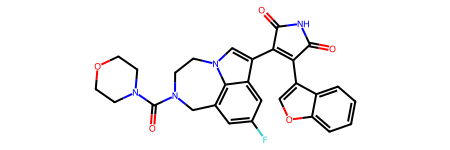

In [55]:
df_output.ROMol.iloc[0]

## Guardar el dataframe obtenido

Se va a guardar el dataframe como un archivo csv

In [56]:
df_output.to_csv(f"data/compounds_{uniprot_id}_full.csv", index=0)

## Actividad práctica
Teniendo en cuenta lo aprendido en este Notebook, responda:
1. ¿Qué otros datos podemos obtener de ChEMBL del target de interés?
2. ¿Se podría realizar una nueva clasificación de los compuestos filtrándolos únicamente por el pEC50?, compruébelo y observe las diferencias
3. Obtenga los datos conocidos de los compuestos, referentes a inhibición y actividad.

## Conclusiones
En esta práctica se empleó la base de datos ChEMBL para obtener datos de compuestos bioactivos frente a nuestro target de interés. Estos datos extraidos en forma de diccionarios y listas se convirtieron en un DataFrame el cual permite visualizar fácilmente la información obtenida. Además, se obtuvieron datos de los compuestos bioactivos, combinaron DataFrames, se renombraron columnas y se utilizó una herramienta de panda para añadir una nueva columna al DataFrame construido.

# Referencias
1. Coudert, E., Gehant, S., De Castro, E., Pozzato, M., Baratin, D., Neto, T., Sigrist, C. J. A., Redaschi, N., Bridge, A., The UniProt Consortium, Bridge, A. J., Aimo, L., Argoud-Puy, G., Auchincloss, A. H., Axelsen, K. B., Bansal, P., Baratin, D., Neto, T. M. B., Blatter, M.-C., … Wang, Y. (2023). Annotation of biologically relevant ligands in UniProtKB using ChEBI. Bioinformatics, 39(1), btac793. https://doi.org/10.1093/bioinformatics/btac793
2. Mendez, D., Gaulton, A., Bento, A. P., Chambers, J., De Veij, M., Félix, E., Magariños, M. P., Mosquera, J. F., Mutowo, P., Nowotka, M., Gordillo-Marañón, M., Hunter, F., Junco, L., Mugumbate, G., Rodriguez-Lopez, M., Atkinson, F., Bosc, N., Radoux, C. J., Segura-Cabrera, A., … Leach, A. R. (2019). ChEMBL: Towards direct deposition of bioassay data. Nucleic Acids Research, 47(D1), D930-D940. https://doi.org/10.1093/nar/gky1075
3. Aykul, S., & Martinez-Hackert, E. (2016). Determination of half-maximal inhibitory concentration using biosensor-based protein interaction analysis. Analytical Biochemistry, 508, 97-103. https://doi.org/10.1016/j.ab.2016.06.025
4. Waller, D. G., & Sampson, A. P. (2018). Principles of pharmacology and mechanisms of drug action. En Medical Pharmacology and Therapeutics (pp. 3-31). Elsevier. https://doi.org/10.1016/B978-0-7020-7167-6.00001-4
5. Daylight>cheminformatics. (2022). https://www.daylight.com/smiles/ 
